In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

It's not the real data

In [ ]:
dataset = os.path.join("datasets", "EPA_fuel_economy_summary.csv")
df = pd.read_csv(dataset)
df

,make,model,year,transmission,drive,date_range,fuel_type_summary,class_summary,cylinders,displ,co2,barrels08,fuelCost08,comb08,highway08,city08
0,Acura,NSX,2000,Automatic,2WD,2000-2010,Gas,Car,6.0,3.0,-1,16.528333,3250,18,22,15
1,Acura,NSX,2000,Manual,2WD,2000-2010,Gas,Car,6.0,3.2,-1,16.528333,3250,18,22,15
2,BMW,M Coupe,2000,Manual,2WD,2000-2010,Gas,Car,6.0,3.2,-1,15.658421,3050,19,23,17
3,BMW,Z3 Coupe,2000,Automatic,2WD,2000-2010,Gas,Car,6.0,2.8,-1,15.658421,3050,19,24,17
4,BMW,Z3 Coupe,2000,Manual,2WD,2000-2010,Gas,Car,6.0,2.8,-1,15.658421,3050,19,24,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23980,Rolls-Royce,Wraith Black Badge,2020,Automatic,2WD,2011-2020,Gas,Car,12.0,6.6,624,21.250714,4150,14,18,12
23981,Rolls-Royce,Ghost Black Badge,2020,Automatic,2WD,2011-2020,Gas,Car,12.0,6.6,637,21.250714,4150,14,18,12
23982,Roush Performance,F150 Pickup 4WD,2020,Automatic,4WD,2011-2020,Gas,Truck,8.0,5.0,696,22.885385,4500,13,16,11
23983,Koenigsegg,Regera,2019,Automatic,2WD,2011-2020,Gas,Car,8.0,5.0,610,27.046364,5300,11,11,11


In [ ]:
sns.set_style("darkgrid")

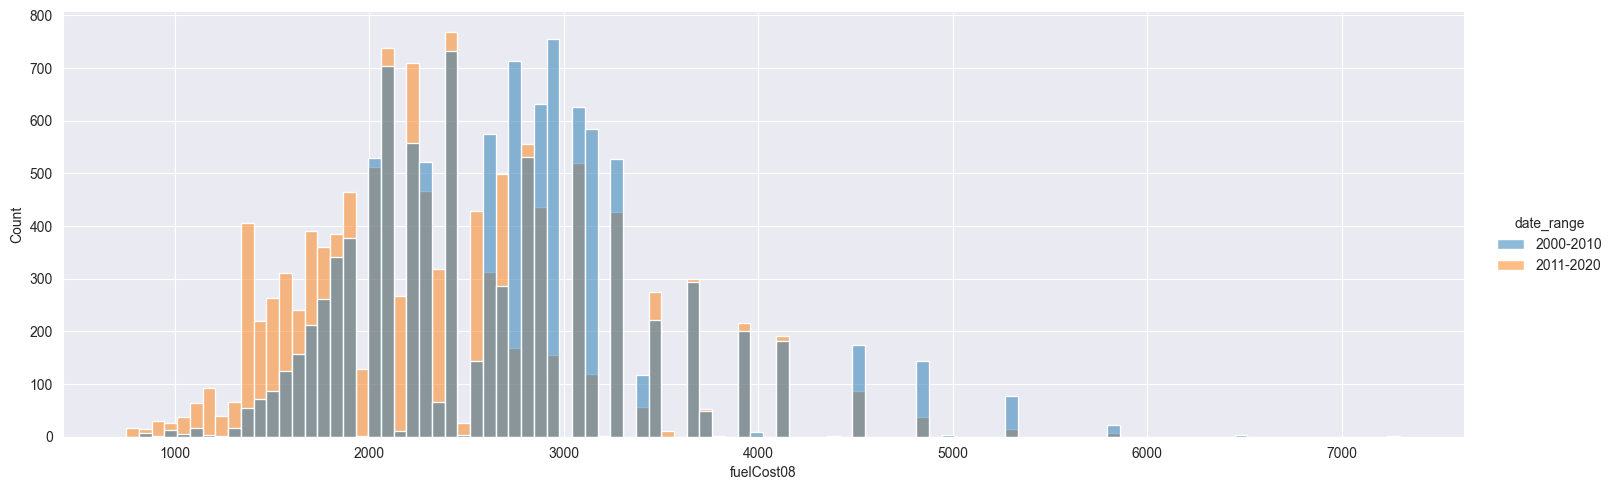

In [ ]:
sns.displot(data=df, x="fuelCost08", hue="date_range", aspect=3)

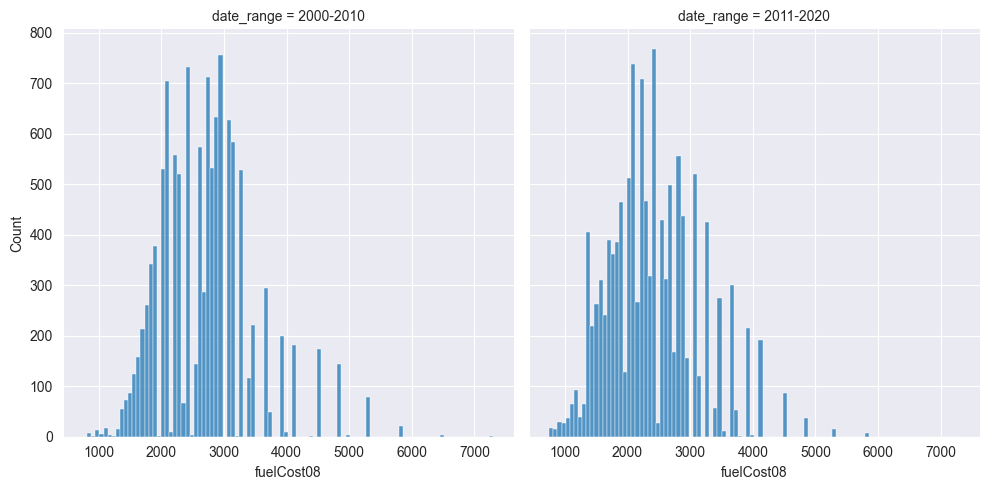

In [ ]:
sns.displot(data=df, x="fuelCost08", col="date_range")

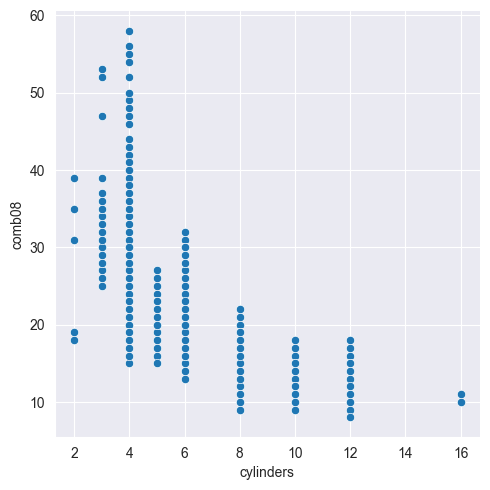

In [ ]:
sns.relplot(data=df, x="cylinders", y="comb08", kind="scatter")

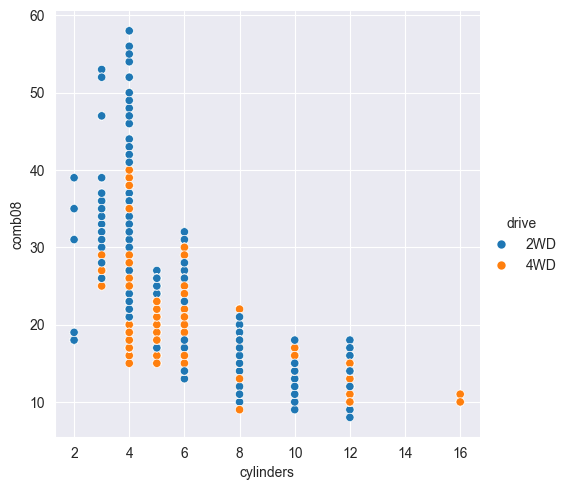

In [ ]:
sns.relplot(data=df, x="cylinders", y="comb08", hue="drive", kind="scatter")

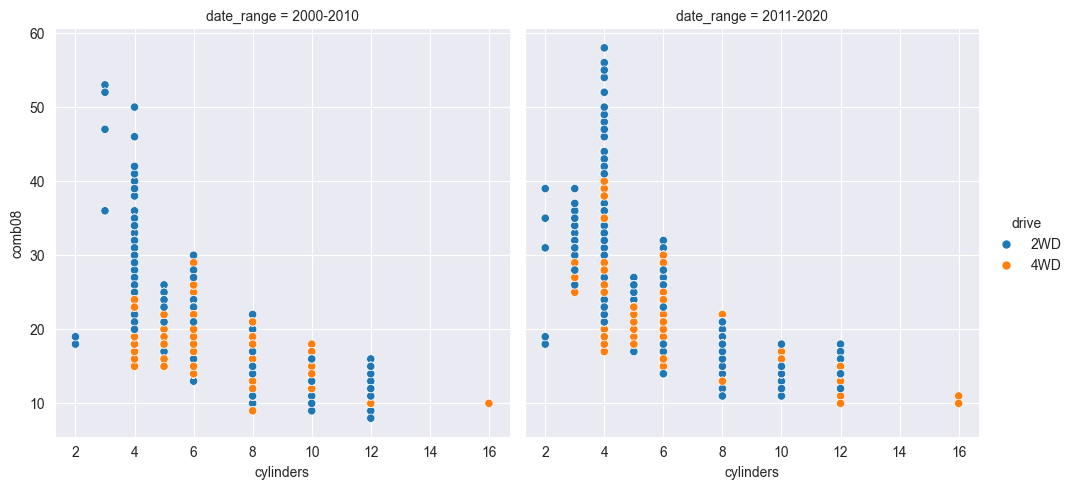

In [ ]:
sns.relplot(
    data=df, x="cylinders", y="comb08", hue="drive", col="date_range", kind="scatter"
)

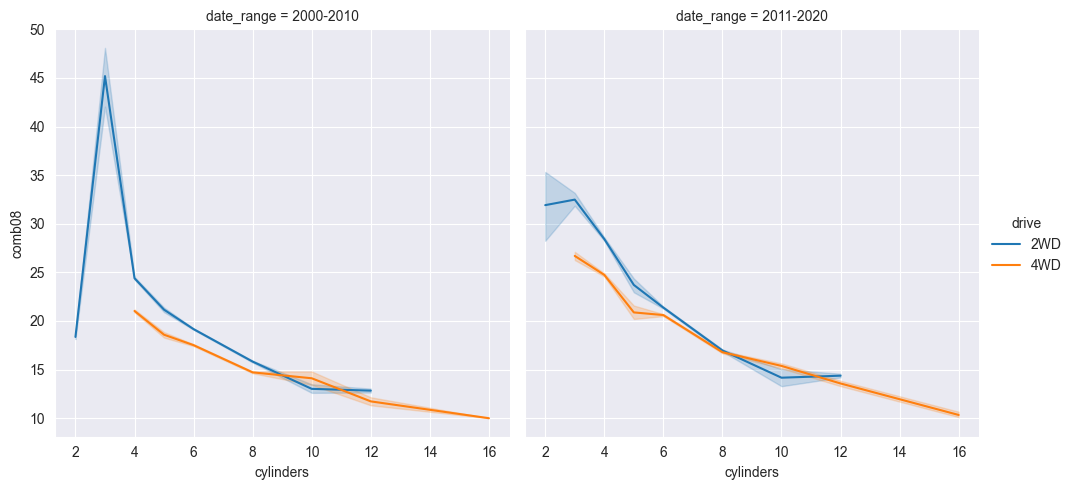

In [ ]:
sns.relplot(
    data=df, x="cylinders", y="comb08", hue="drive", col="date_range", kind="line"
)

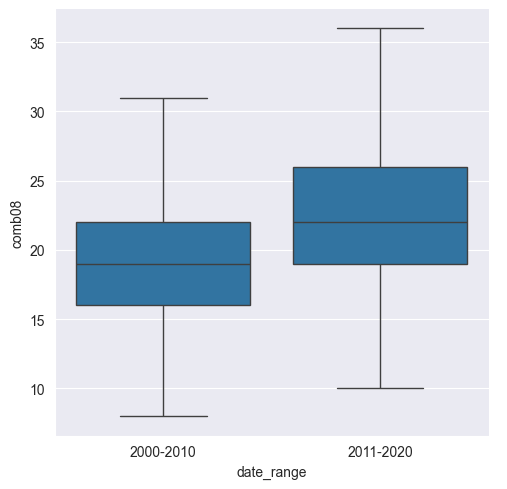

In [ ]:
sns.catplot(data=df, x="date_range", y="comb08", kind="box", showfliers=False)

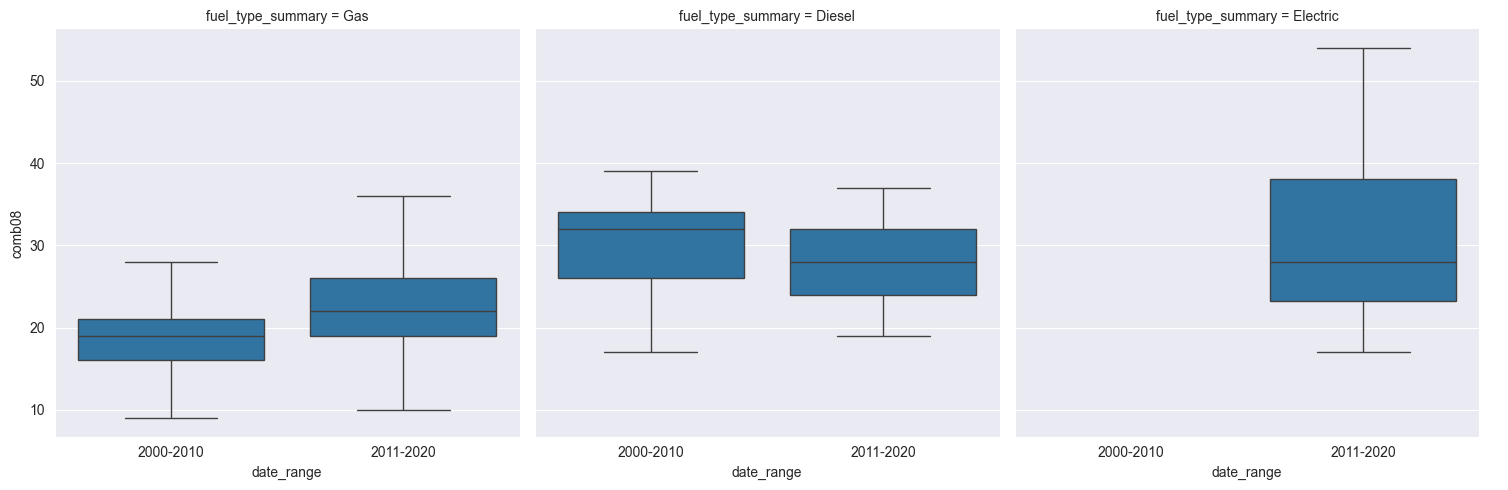

In [ ]:
sns.catplot(
    data=df,
    x="date_range",
    y="comb08",
    col="fuel_type_summary",
    kind="box",
    showfliers=False,
)

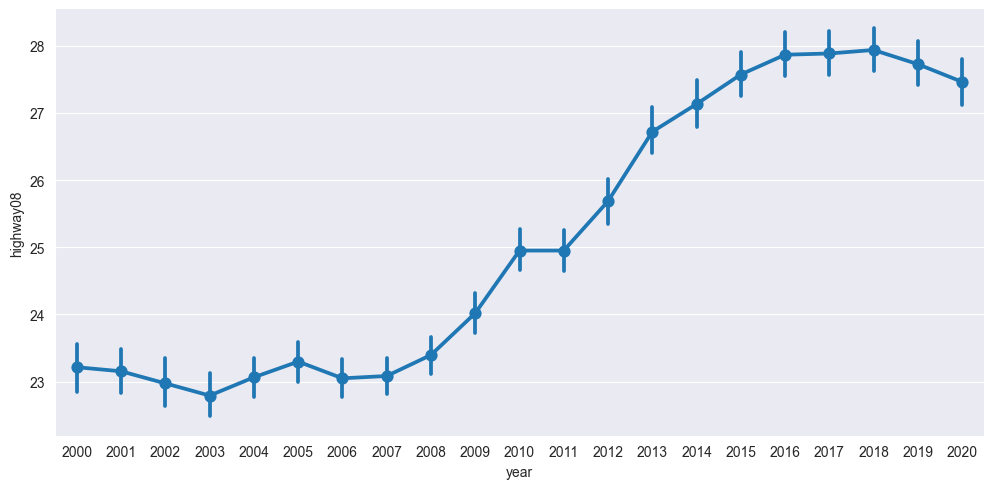

In [ ]:
sns.catplot(data=df, x="year", y="highway08", kind="point", aspect=2)

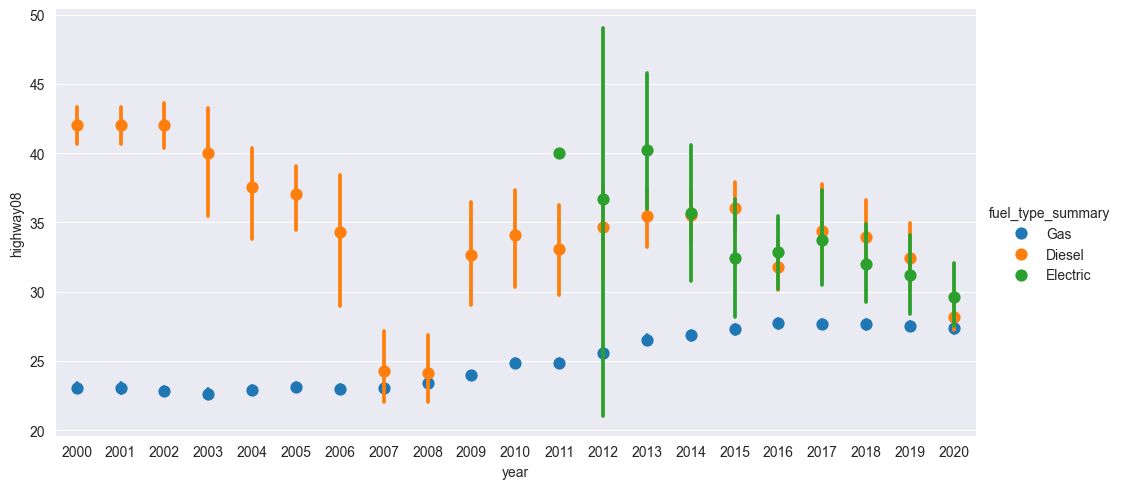

In [ ]:
sns.catplot(
    data=df,
    x="year",
    y="highway08",
    kind="point",
    aspect=2,
    hue="fuel_type_summary",
    linestyle="none",
)

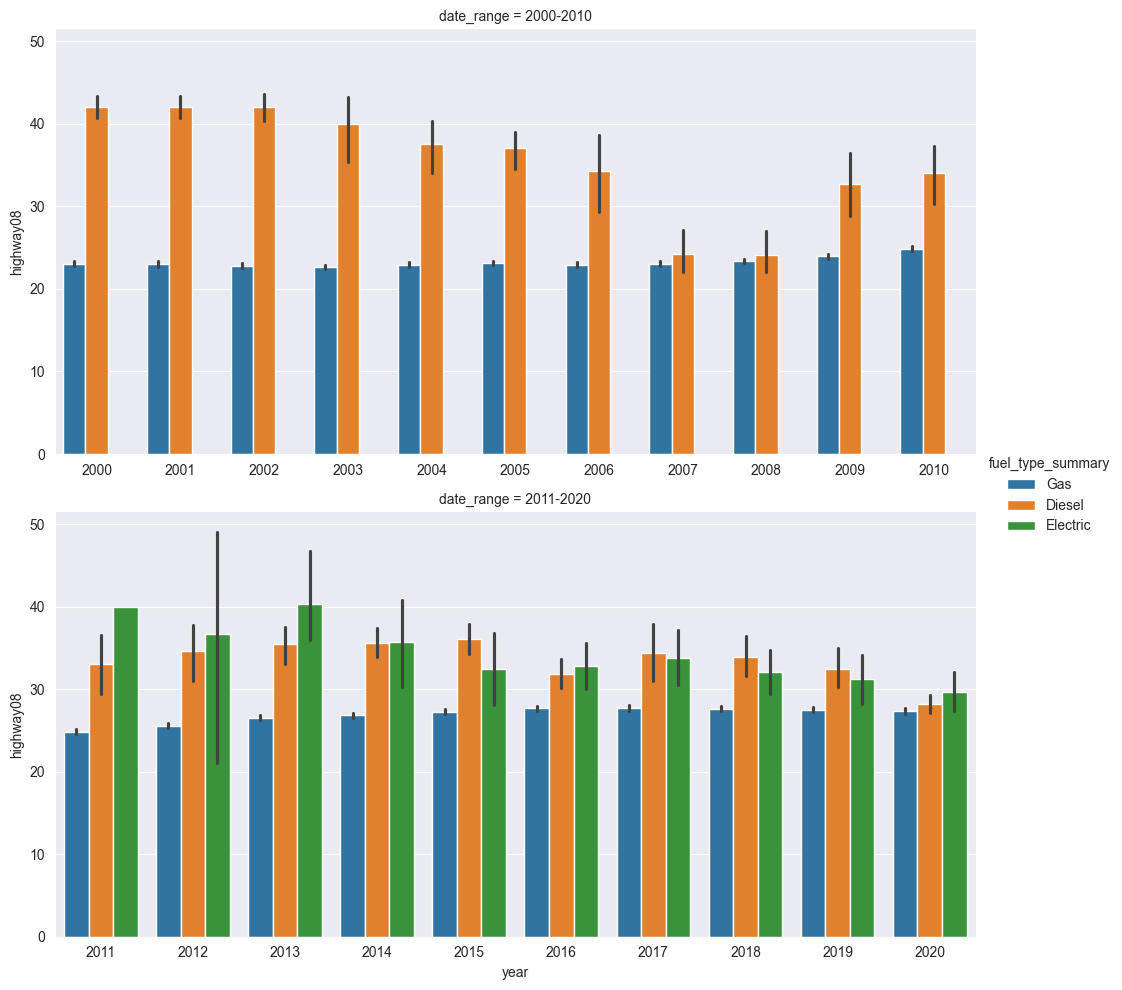

In [ ]:
sns.catplot(
    data=df,
    x="year",
    row="date_range",
    y="highway08",
    aspect=2,
    hue="fuel_type_summary",
    kind="bar",
    sharex=False,
)

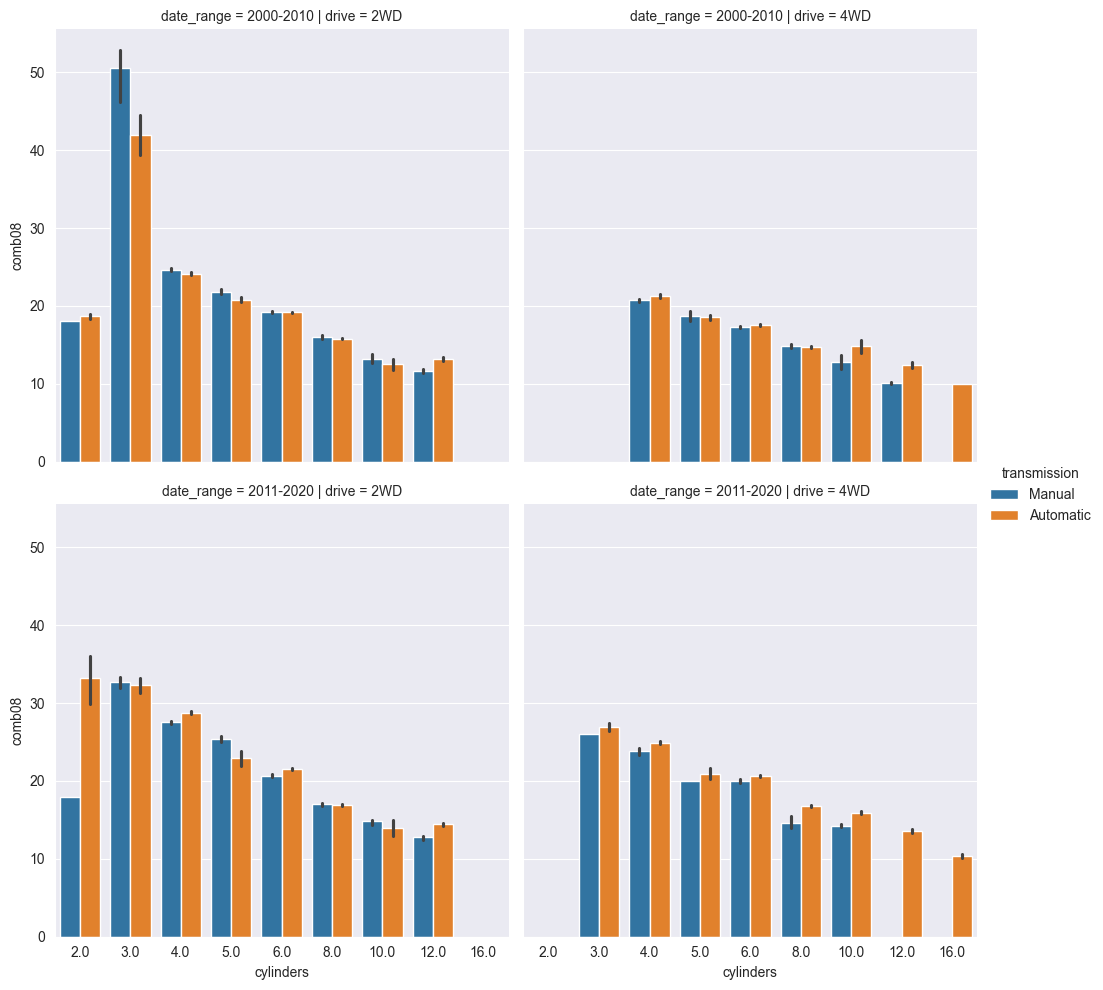

In [92]:
sns.catplot(
    data=df,
    y="comb08",
    x="cylinders",
    col="drive",
    row="date_range",
    hue="transmission",
    kind="bar",
)

In [102]:
fuel_class = pd.crosstab(
    df['class_summary'],
    df['fuel_type_summary'],
    values=df['comb08'],
    aggfunc='mean'
)
fuel_class

fuel_type_summary,Diesel,Electric,Gas
class_summary,,,
Car,32.817680,32.797101,22.452724
SUV,24.216495,24.000000,19.404911
Truck,23.133333,NaN,16.945417
Van,NaN,31.000000,16.252174


<Axes: xlabel='fuel_type_summary', ylabel='class_summary'>

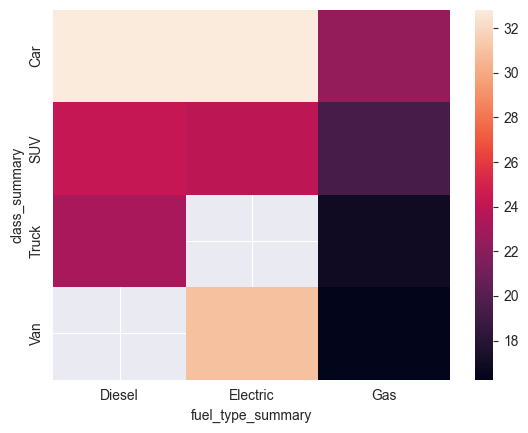

In [103]:
sns.heatmap(fuel_class)

<Axes: xlabel='fuel_type_summary', ylabel='class_summary'>

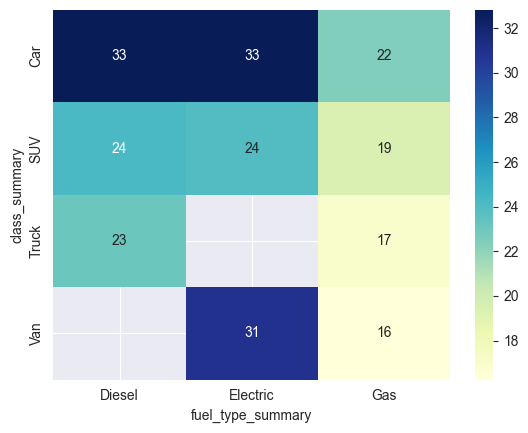

In [104]:
sns.heatmap(
    fuel_class,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu'
)

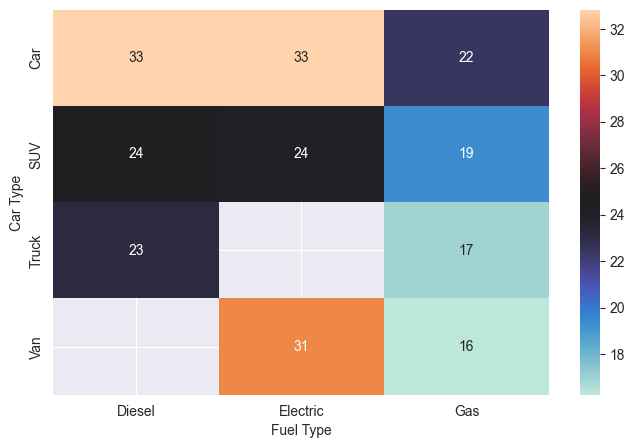

In [107]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(fuel_class, annot=True, fmt='.0f', cmap='icefire', ax=ax)
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Car Type');

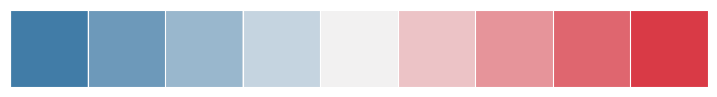

In [108]:
sns.palplot(sns.diverging_palette(240, 10, n=9))

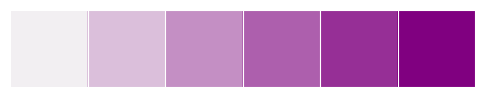

In [109]:
sns.palplot(sns.light_palette('purple'))

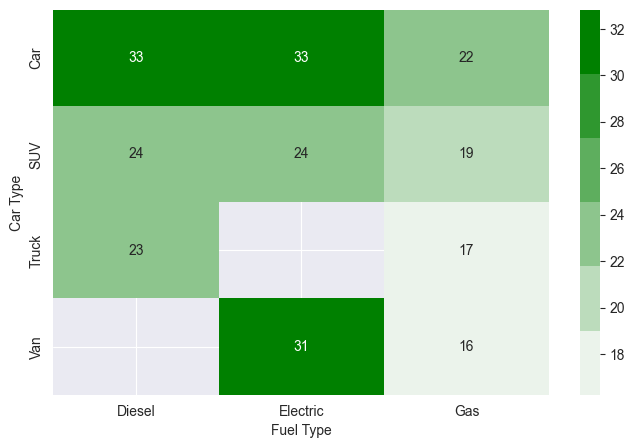

In [117]:
fig, ax = plt.subplots(figsize=(8,5))
custom_cmap = sns.light_palette('green', as_cmap=False)
sns.heatmap(fuel_class, annot=True, fmt='.0f', cmap=custom_cmap, ax=ax)
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Car Type');

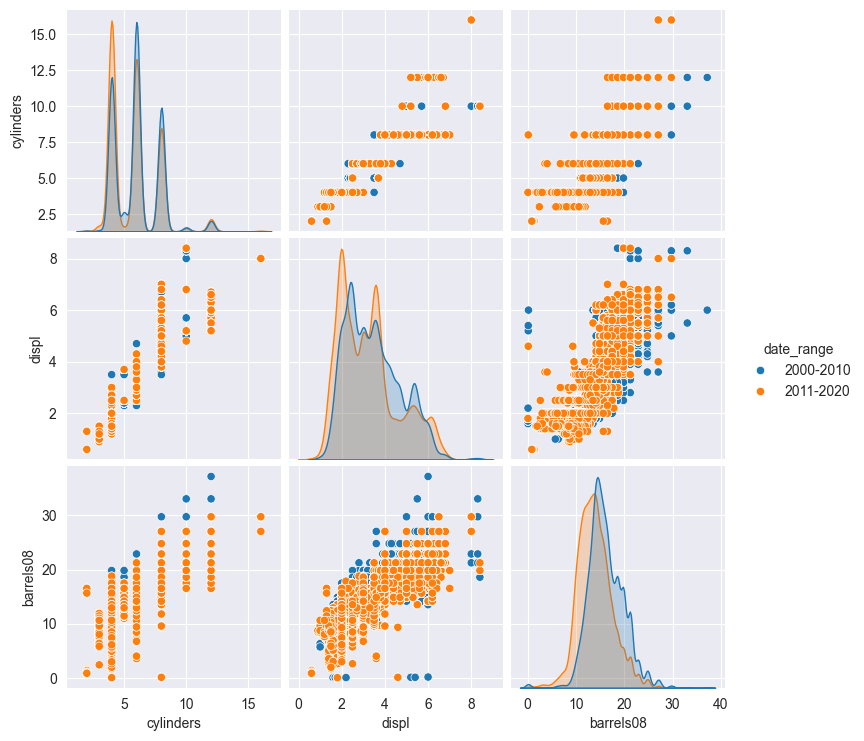

In [118]:
sns.pairplot(
    df,
    x_vars=['cylinders', 'displ', 'barrels08'],
    y_vars=['cylinders', 'displ', 'barrels08'],
    hue='date_range'
)

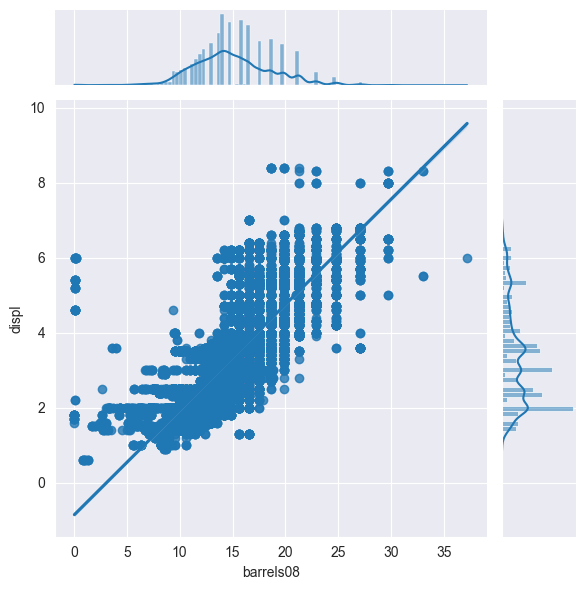

In [122]:
sns.jointplot(data=df, x='barrels08', y='displ', kind='reg')

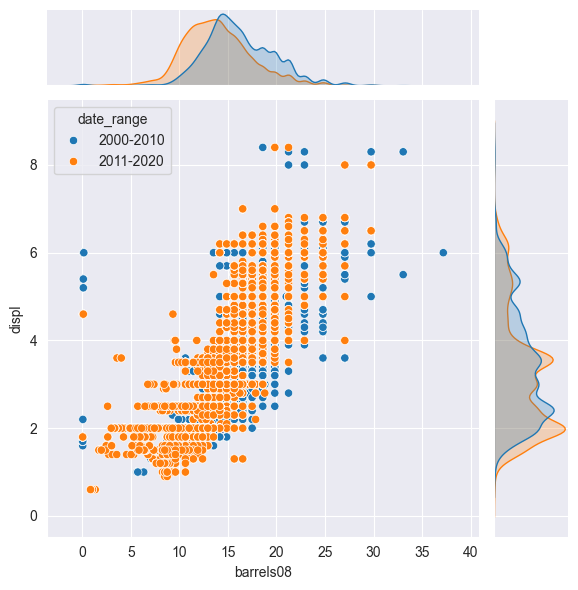

In [123]:
sns.jointplot(data=df, x='barrels08', y='displ', hue='date_range')